# **Linear Programming**

This notebook contains illustrative examples for solving linear programs using the **Simplex  method** and a specific version of a **Genetic Algorithm**. The examples cover all possible definitions of linear problems and a quick comparison of the two approaches alongside some matplotlib illustrations. 

First, import some stuff. Note that the notebook requires matplotlib to be installed.

In [1]:
from dewloosh.math.function import Function, Equality, InEquality
from dewloosh.math.optimize import LinearProgrammingProblem as LPP, \
    DegenerateProblemError, NoSolutionError, BinaryGeneticAlgorithm
from dewloosh.math.array import atleast2d
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt


## Solution of Symbolic LPPs with the **Simplex method**

One of the great features of the optimization module is that is handles symbolic functions pretty well. Problems can be defined using `SymPy` expressions, or simple strings. The solution of an LPP can only result in one of the following cases:
    
* the problem has one unique optimizer
  
* the problem has multiple solutions
  
* there is no solution to the problem
  
* the problem is degenerate

The following set of blocks introduce an example for each of the above cases.

### Unique Solution

In [2]:
"""
Example for unique solution
(0, 6, 0, 4) --> 10
The following order automatically creates
a feasble solution : [0, 2, 3, 1]
"""
variables = ['x1', 'x2', 'x3', 'x4']
x1, x2, x3, x4 = syms = sy.symbols(variables, positive=True)
obj1 = Function(3*x1 + 9*x3 + x2 + x4, variables=syms)
eq11 = Equality(x1 + 2*x3 + x4 - 4, variables=syms)
eq12 = Equality(x2 + x3 - x4 - 2, variables=syms)
lpp = LPP(cost=obj1, constraints=[eq11, eq12], variables=syms)
lpp.solve(order=[0, 2, 3, 1], raise_errors=True)['x']


array([0., 6., 0., 4.])

To obtain the results as a dictionary, use the `as_dict` keyword:

In [3]:
lpp.solve(order=[0, 2, 3, 1], raise_errors=True, as_dict=True)['x']


{x1: array(0.), x2: array(6.), x3: array(0.), x4: array(4.)}

### Degenerate Solution

If the objective could be further decreased, but only on the expense of violating feasibility, the solution is degenerate.

In [4]:
"""
Example for degenerate solution.
(0, 2, 0, 0)
"""
variables = ['x1', 'x2', 'x3', 'x4']
x1, x2, x3, x4 = syms = sy.symbols(variables, positive=True)
obj2 = Function(3*x1 + x2 + 9*x3 + x4, variables=syms)
eq21 = Equality(x1 + 2*x3 + x4, variables=syms)
eq22 = Equality(x2 + x3 - x4 - 2, variables=syms)
P2 = LPP(cost=obj2, constraints=[eq21, eq22], variables=syms)
try:
    print(P2.solve(raise_errors=True)['x'])
except NoSolutionError:
    print('NoSolutionError')
except DegenerateProblemError:
    print('DegenerateProblemError')


DegenerateProblemError


### No Solution

In [5]:
"""
Example for no solution.
"""
variables = ['x1', 'x2', 'x3', 'x4']
x1, x2, x3, x4 = syms = sy.symbols(variables, positive=True)
obj3 = Function(-3*x1 + x2 + 9*x3 + x4, variables=syms)
eq31 = Equality(x1 - 2*x3 - x4 + 2, variables=syms)
eq32 = Equality(x2 + x3 - x4 - 2, variables=syms)
P3 = LPP(cost=obj3, constraints=[eq31, eq32], variables=syms)
try:
    print(P3.solve(raise_errors=True)['x'])
except NoSolutionError:
    print('NoSolutionError')
except DegenerateProblemError:
    print('DegenerateProblemError')


NoSolutionError


### Multiple Solutions

Here we plot the shape of the result of our problem.

In [6]:
"""
Example for multiple solutions.
(0, 1, 1, 0)
(0, 4, 0, 2)
"""
variables = ['x1', 'x2', 'x3', 'x4']
x1, x2, x3, x4 = syms = sy.symbols(variables, positive=True)
obj4 = Function(3*x1 + 2*x2 + 8*x3 + x4, variables=syms)
eq41 = Equality(x1 - 2*x3 - x4 + 2, variables=syms)
eq42 = Equality(x2 + x3 - x4 - 2, variables=syms)
P4 = LPP(cost=obj4, constraints=[eq41, eq42], variables=syms)
try:
    print(P4.solve()['x'].shape)
except NoSolutionError:
    print('NoSolutionError')
except DegenerateProblemError:
    print('DegenerateProblemError')


(2, 4)


## 2d example with `matplotlib`

In [7]:
x1, x2 = sy.symbols(['x1', 'x2'], positive=True)
syms = [x1, x2]
f = Function(x1 + x2, variables=syms)
ieq1 = InEquality(x1 - 1, op='>=', variables=syms)
ieq2 = InEquality(x2 - 1, op='>=', variables=syms)
ieq3 = InEquality(x1 + x2 - 4, op='<=', variables=syms)
lpp = LPP(cost=f, constraints=[ieq1, ieq2, ieq3], variables=syms)
x = atleast2d(lpp.solve()['x'])


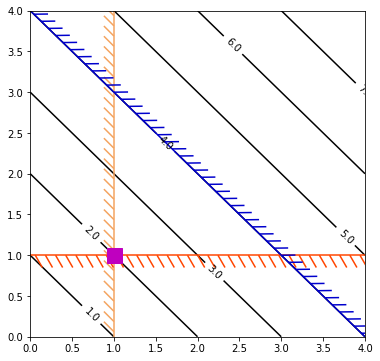

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects

fig, ax = plt.subplots(figsize=(6, 6))

nx = 101
ny = 105

# Set up survey vectors
xvec = np.linspace(0.001, 4.0, nx)
yvec = np.linspace(0.001, 4.0, ny)

# Set up survey matrices.  Design disk loading and gear ratio.
x1, x2 = np.meshgrid(xvec, yvec)

# Evaluate some stuff to plot
obj = x1 + x2
g1 = x1 - 1
g2 = x2 - 1
g3 = x1 + x2 - 4

cntr = ax.contour(x1, x2, obj, colors='black')
ax.clabel(cntr, fmt="%2.1f", use_clabeltext=True)

cg1 = ax.contour(x1, x2, g1, [0], colors='sandybrown')
plt.setp(cg1.collections, path_effects=[
         patheffects.withTickedStroke(angle=-135)])

cg2 = ax.contour(x1, x2, g2, [0], colors='orangered')
plt.setp(cg2.collections, path_effects=[
         patheffects.withTickedStroke(angle=-60)])

cg3 = ax.contour(x1, x2, g3, [0], colors='mediumblue')
plt.setp(cg3.collections, path_effects=[patheffects.withTickedStroke()])

ax.plot(x[:, 0], x[:, 1], 'ms', markersize=15)

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

plt.show()


## Solution with a **Binary Genetic Algorithm (BGA)**

It's completely nuts to solve LLPs with a GA, but wrapping up an LLP in standard form is actually quite easy and makes for a good example. 

In [9]:
x1, x2 = sy.symbols(['x1', 'x2'], positive=True)
syms = [x1, x2]
f = Function(x1 + x2, variables=syms)
ieq1 = InEquality(x1 - 1, op='>=', variables=syms)
ieq2 = InEquality(x2 - 1, op='>=', variables=syms)
ieq3 = InEquality(x1 + x2 - 4, op='<=', variables=syms)
lpp = LPP(cost=f, constraints=[ieq1, ieq2, ieq3], variables=syms)
lpp.solve()['x']


array([1., 1.])

The BGA imlmeneted in `dewloosh.math.optimize` does not accept constraints, all the requirements must be cooked into the objective function. A simple way of accomplishing this is to add penalties to the objective on constraint violations:

In [10]:
def cost(x):
    return lpp.obj(x) if lpp.feasible(x) else lpp.obj(x) + 1e12


In [11]:
BinaryGeneticAlgorithm(cost, [[0, 4], [0, 4]], length=12, nPop=200).solve()


array([1.0002442, 1.0002442])